# Проверка гипотез в бизнесе

## Введение

### Заказчик
<font color='#777778'> Агрегатор отелей. </font>

### Цель проекта

<font color='#777778'> Изучить и визуализировать данные о туризме в России, проверить гипотезы о динамике туристической индустрии и предоставить рекомендации для улучшения сервиса. </font>

### Задачи проекта 

<font color='#777778'>    
    
- Подготовка данных 
    
- Исследовательский анализ данных
    
- Проверка гипотез
</font>

# Описание данных

Таблица `hotel.csv`:
- `Субъект` — наименование субъекта Российской Федерации.
- `Число гостиниц`.
- `Число мест в гостиницах`.
- `Число хостелов`.
- `Число мест в хостелах`.
- `Число санаторно-курортных организаций`.
- `Число мест в санаторно-курортных организациях`.

Таблица `count_person_hotel.csv`:
- `Субъект` — наименование субъекта Российской Федерации.
- `Численность лиц, размещенных в гостиницах в 2023 году`.
- `Численность граждан России, размещенных в гостиницах в 2023 году`.
- `Численность иностранных граждан, размещенных в гостиницах в 2023 году`.

Таблица `tour_firm.csv`:
- `Субъект` — наименование субъекта Российской Федерации.
- `Общее число турпакетов, реализованных населению`.
- `Общее число турпакетов, реализованных гражданам России по территории России`.
- `Общее число турпакетов, реализованных гражданам России по другим странам`.
- `Общее число турпакетов, реализованных гражданам других стран по территории России`.

Таблица `tour_cost_2023.csv`:
- `Субъект` — наименование субъекта Российской Федерации.
- `Стоимость реализованных турпакетов в 2023 году, млн руб.`.
- `Стоимость турпакетов  реализованных гражданам России по территории России в 2023 году, млн руб.`.
- `Стоимость турпакетов  реализованных гражданам России по другим странам в 2023 году, млн руб.`.

### Содержимое проекта

<font color='#777778'>

1. [Загрузка и знакомство с данными.](#1-bullet)
2. [Предобработка данных](#2-bullet)
3. [Исследовательский анализ данных.](#3-bullet)
4. [Проверка гипотез](#4-bullet)
</font>

---

<a class="anchor" id="1-bullet"></a>
## Шаг 1. Загрузка данных

In [43]:
# Импортируем библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np

In [44]:
# Прочитаем датафреймы

df_hotel = pd.read_csv('https://code.s3.yandex.net/datasets/hotel.csv', sep=';')
df_person_hotel = pd.read_csv('https://code.s3.yandex.net/datasets/count_person_hotel.csv', sep=';')
df_tour_firm = pd.read_csv('https://code.s3.yandex.net/datasets/tour_firm.csv', sep=';')
df_tour_cost_2023 = pd.read_csv('https://code.s3.yandex.net/datasets/tour_cost_2023.csv', sep=';')

In [45]:
# Поочередно выведем первые 5 строк каждого датафрейма

df_hotel.head(5)

,Субъект,"Число гостиниц, 2018","Число гостиниц, 2019","Число гостиниц, 2020","Число гостиниц, 2021","Число гостиниц, 2022","Число гостиниц, 2023","Число мест в гостиницах, 2018","Число мест в гостиницах, 2019","Число мест в гостиницах, 2020",...,"Число санаторно-курортных организаций, 2020","Число санаторно-курортных организаций, 2021","Число санаторно-курортных организаций, 2022","Число санаторно-курортных организаций, 2023","Число мест в санаторно-курортных организациях, 2018","Число мест в санаторно-курортных организациях, 2019","Число мест в санаторно-курортных организациях, 2020","Число мест в санаторно-курортных организациях, 2021","Число мест в санаторно-курортных организациях, 2022","Число мест в санаторно-курортных организациях, 2023"
0,Белгородская область,97,101,103,100,101,99,4753,5144,5390,...,11,11,11,11,1969,1938,1969,1969,2212,1999
1,Брянская область,74,78,86,92,91,93,3436,3507,3782,...,14,14,14,13,2953,2829,2430,2837,2672,2937
2,Владимирская область,100,100,114,119,121,125,7679,8059,8815,...,6,8,9,8,1220,1324,1205,1530,1542,1328
3,Воронежская область,141,147,151,163,170,179,9605,10419,10040,...,15,15,14,14,3241,3302,3320,3320,3243,3337
4,Ивановская область,48,52,55,74,64,59,2774,2998,3009,...,14,17,15,15,4347,4341,4485,4616,4396,4293


In [46]:
df_person_hotel.head(5)

,Субъект,"Численность лиц, размещенных в гостиницах в 2023 году","Численность граждан России, размещенных в гостиницах в 2023 году","Численность иностранных граждан, размещенных в гостиницах в 2023 году"
0,Белгородская область,180442,177536,2906
1,Брянская область,182217,173980,8237
2,Владимирская область,526768,517456,9312
3,Воронежская область,760489,732562,27927
4,Ивановская область,227632,225030,2602


In [47]:
df_tour_firm.head(5)

,Субъект,"Общее число турпакетов, реализованных населению, 2018","Общее число турпакетов, реализованных гражданам России по территории России, 2018","Общее число турпакетов, реализованных гражданам России по другим странам, 2018","Общее число турпакетов, реализованных гражданам других стран по территории России, 2018","Общее число турпакетов, реализованных населению, 2019","Общее число турпакетов, реализованных гражданам России по территории России, 2019","Общее число турпакетов, реализованных гражданам России по другим странам, 2019","Общее число турпакетов, реализованных гражданам других стран по территории России, 2019","Общее число турпакетов, реализованных населению, 2020",...,"Общее число турпакетов, реализованных гражданам России по другим странам, 2021","Общее число турпакетов, реализованных гражданам других стран по территории России, 2021","Общее число турпакетов, реализованных населению, 2022","Общее число турпакетов, реализованных гражданам России по территории России, 2022","Общее число турпакетов, реализованных гражданам России по другим странам, 2022","Общее число турпакетов, реализованных гражданам других стран по территории России, 2022","Общее число турпакетов, реализованных населению, 2023","Общее число турпакетов, реализованных гражданам России по территории России, 2023","Общее число турпакетов, реализованных гражданам России по другим странам, 2023","Общее число турпакетов, реализованных гражданам других стран по территории России, 2023"
0,Белгородская область,14138,4333,9805,NaN,20646,4772,15874,NaN,9694,...,9239.0,NaN,15222,8887,6165,170.0,17733,11803,5930.0,NaN
1,Брянская область,9444,4438,5004,2.0,10459,4966,5492,1,3435,...,3479.0,NaN,11591,8265,3326,NaN,10165,5377,4788.0,NaN
2,Владимирская область,23900,12294,11243,363.0,23065,11558,10394,1113,7334,...,6426.0,7,18288,11359,6924,5.0,22334,13588,8737.0,9.0
3,Воронежская область,14554,8124,6430,NaN,14464,4613,9851,NaN,6681,...,7923.0,NaN,20958,13608,7350,NaN,24993,14781,10212.0,NaN
4,Ивановская область,17049,6592,10457,NaN,17019,8327,8692,NaN,6477,...,4445.0,NaN,13637,8575,5062,NaN,18904,11002,7902.0,NaN


In [48]:
df_tour_cost_2023.head(5)

,Субъект,"Стоимость реализованных турпакетов в 2023 году, млн руб.","Стоимость турпакетов реализованных гражданам России по территории России в 2023 году, млн руб.","Стоимость турпакетов реализованных гражданам России по другим странам в 2023 году, млн руб."
0,Белгородская область,1731.9856000000002,451.745,1280.2406
1,Брянская область,1409.2361,455.8798,953.3563
2,Владимирская область,2619.7022,912.2325,1706.2733999999998
3,Воронежская область,2877.2381,688.3641,2188.874
4,Ивановская область,1906.7206999999999,612.5177,1294.203


<a class="anchor" id="2-bullet"></a>
## Шаг 2. Знакомство с данными и их предварительная подготовка

In [49]:
# Выведем названия столбцов

def print_columns(*dataframes):
    for i, df in enumerate(dataframes, 1):
        print(f"Датафрейм {i}:")
        print(df.columns.tolist())
        print()  

print_columns(df_hotel, df_person_hotel, df_tour_firm, df_tour_cost_2023)

Датафрейм 1:
['Субъект', 'Число гостиниц, 2018', 'Число гостиниц, 2019', 'Число гостиниц, 2020', 'Число гостиниц, 2021', 'Число гостиниц, 2022', 'Число гостиниц, 2023', 'Число мест в гостиницах, 2018', 'Число мест в гостиницах, 2019', 'Число мест в гостиницах, 2020', 'Число мест в гостиницах, 2021', 'Число мест в гостиницах, 2022', 'Число мест в гостиницах, 2023', 'Число хостелов, 2018', 'Число хостелов, 2019', 'Число хостелов, 2020', 'Число хостелов, 2021', 'Число хостелов, 2022', 'Число хостелов, 2023', 'Число мест в хостелах, 2018', 'Число мест в хостелах, 2019', 'Число мест в хостелах, 2020', 'Число мест в хостелах, 2021', 'Число мест в хостелах, 2022', 'Число мест в хостелах, 2023', 'Число санаторно-курортных организаций, 2018', 'Число санаторно-курортных организаций, 2019', 'Число санаторно-курортных организаций, 2020', 'Число санаторно-курортных организаций, 2021', 'Число санаторно-курортных организаций, 2022', 'Число санаторно-курортных организаций, 2023', 'Число мест в санатор

Уберем лишние пробелы и символы в названиях столбцов, чтобы не возникало ошибок при дальнейшей обработке. Также изменим названия на более ёмкие.

In [50]:
# Присвоим столбцам новые названия

column_names_hotel = [
    "region", "hotels_2018", "hotels_2019", "hotels_2020", "hotels_2021",
    "hotels_2022", "hotels_2023", "beds_hotels_2018", "beds_hotels_2019",
    "beds_hotels_2020", "beds_hotels_2021", "beds_hotels_2022", "beds_hotels_2023",
    "hostels_2018", "hostels_2019", "hostels_2020", "hostels_2021", "hostels_2022", "hostels_2023",
    "beds_hostels_2018", "beds_hostels_2019", "beds_hostels_2020", "beds_hostels_2021", "beds_hostels_2022",
    "beds_hostels_2023", "spa_orgs_2018", "spa_orgs_2019", "spa_orgs_2020", "spa_orgs_2021", "spa_orgs_2022", "spa_orgs_2023",
    "beds_spa_2018", "beds_spa_2019", "beds_spa_2020", "beds_spa_2021", "beds_spa_2022", "beds_spa_2023"
]

In [51]:
df_hotel.columns = column_names_hotel
df_hotel.columns

Index(['region', 'hotels_2018', 'hotels_2019', 'hotels_2020', 'hotels_2021',
       'hotels_2022', 'hotels_2023', 'beds_hotels_2018', 'beds_hotels_2019',
       'beds_hotels_2020', 'beds_hotels_2021', 'beds_hotels_2022',
       'beds_hotels_2023', 'hostels_2018', 'hostels_2019', 'hostels_2020',
       'hostels_2021', 'hostels_2022', 'hostels_2023', 'beds_hostels_2018',
       'beds_hostels_2019', 'beds_hostels_2020', 'beds_hostels_2021',
       'beds_hostels_2022', 'beds_hostels_2023', 'spa_orgs_2018',
       'spa_orgs_2019', 'spa_orgs_2020', 'spa_orgs_2021', 'spa_orgs_2022',
       'spa_orgs_2023', 'beds_spa_2018', 'beds_spa_2019', 'beds_spa_2020',
       'beds_spa_2021', 'beds_spa_2022', 'beds_spa_2023'],
      dtype='object')

In [52]:
column_person_hotel = [
    "region",
    "total_guests_2023",
    "russian_guests_2023",
    "foreign_guests_2023"
]
df_person_hotel.columns = column_person_hotel

In [53]:
column_tour_firm = [
    "region",
    "total_tour_packages_2018", "domestic_russia_2018", "international_russia_2018", "foreign_in_russia_2018",
    "total_tour_packages_2019", "domestic_russia_2019", "international_russia_2019", "foreign_in_russia_2019",
    "total_tour_packages_2020", "domestic_russia_2020", "international_russia_2020", "foreign_in_russia_2020",
    "total_tour_packages_2021", "domestic_russia_2021", "international_russia_2021", "foreign_in_russia_2021",
    "total_tour_packages_2022", "domestic_russia_2022", "international_russia_2022", "foreign_in_russia_2022",
    "total_tour_packages_2023", "domestic_russia_2023", "international_russia_2023", "foreign_in_russia_2023"
]
df_tour_firm.columns = column_tour_firm

In [54]:
column_tour_cost_2023  = [
    "region",
    "total_tour_cost_million_2023",
    "domestic_tour_package_cost_million_2023",
    "international_tour_package_cost_million_2023"
]
df_tour_cost_2023.columns = column_tour_cost_2023

Теперь проверим соответствуют ли типы данных ожидаемым.

In [55]:
def print_dtypes(*dataframes):
    for i, df in enumerate(dataframes, 1):
        print(f"Типы данных в датафрейме {i}:")
        print(df.dtypes) 
        print()  

print_dtypes(df_hotel, df_person_hotel, df_tour_firm, df_tour_cost_2023)

Типы данных в датафрейме 1:
region               object
hotels_2018           int64
hotels_2019           int64
hotels_2020           int64
hotels_2021           int64
hotels_2022           int64
hotels_2023           int64
beds_hotels_2018      int64
beds_hotels_2019      int64
beds_hotels_2020      int64
beds_hotels_2021      int64
beds_hotels_2022      int64
beds_hotels_2023      int64
hostels_2018          int64
hostels_2019          int64
hostels_2020          int64
hostels_2021          int64
hostels_2022          int64
hostels_2023          int64
beds_hostels_2018    object
beds_hostels_2019    object
beds_hostels_2020    object
beds_hostels_2021    object
beds_hostels_2022    object
beds_hostels_2023    object
spa_orgs_2018         int64
spa_orgs_2019         int64
spa_orgs_2020         int64
spa_orgs_2021         int64
spa_orgs_2022         int64
spa_orgs_2023         int64
beds_spa_2018        object
beds_spa_2019        object
beds_spa_2020        object
beds_spa_2021       

- Датафрейм `df_hotels`: столбцы, связанные с количеством мест в хостелах (`beds_hostels`) и санаторно-курортных организациях (`beds_spa`), имеют тип object вместо int64. Это может быть связано с наличием пропущенных значений или некорректных данных.
- Датафрейм `df_person_hotel`: типы данных выглядят корректными.
- Датафрейм `df_tour_firm`: большинство столбцов имеют тип object, хотя они должны быть числовыми (int64 или float64). Это может быть связано с наличием пропусков, некорректных символов или строковых значений.
- Датафрейм `df_tour_cost_2023`: все числовые столбцы имеют тип object вместо float64 или int64. Это может быть связано с наличием символов или пропусков.

In [56]:
# Изучим наличие пропусков 

def print_missing_values(*dataframes):
    for i, df in enumerate(dataframes, 1):
        print(f"Пропуски в датафрейме {i}:")
        missing_values = df.isnull().sum().sort_values(ascending=False)
        missing_values = missing_values[missing_values > 0]
        if not missing_values.empty:
            print(missing_values)
        else:
            print("Пропусков нет.")
        print()  

print_missing_values(df_hotel, df_person_hotel, df_tour_firm, df_tour_cost_2023)

Пропуски в датафрейме 1:
Пропусков нет.

Пропуски в датафрейме 2:
Пропусков нет.

Пропуски в датафрейме 3:
foreign_in_russia_2022       40
foreign_in_russia_2020       39
foreign_in_russia_2023       39
foreign_in_russia_2021       37
foreign_in_russia_2018       20
foreign_in_russia_2019       19
international_russia_2021     2
international_russia_2023     1
international_russia_2018     1
international_russia_2022     1
domestic_russia_2021          1
total_tour_packages_2021      1
dtype: int64

Пропуски в датафрейме 4:
Пропусков нет.



Пропуски присутсвуют только в таблице `df_tour_firm`. Изучим природу их возникновения.

In [57]:
df_tour_firm['total_tour_packages_2018'].unique()

array(['14138', '9444', '23900', '14554', '17049', '39436', '7514',
       '10008', '9307', '90769', '9426', '19380', '8597', '4937', '42819',
       '17012', '45116', '1141105', '37138', '18465', '40073', '31355',
       '51653', '22829', '16721', '9953', '10481', '518939', '4333',
       '2065', '77505', '168092', '42277', '31754', '84987', '25080',
       '11186', '…1', '1184', '2729', '1613', '64739', '53395', '10091',
       '12395', '154525', '22639', '17574', '106450', '23960', '76840',
       '22309', '19361', '69299', '27151', '15904', '13303', '170713',
       '75831', '84379', '4812', '1267', '7216', '41144', '57406',
       '49507', '45303', '110277', '41171', '25874', '11872', '147269',
       '15890', '13494', '125105', '42175', '55028', '2832', '8455'],
      dtype=object)

In [58]:
df_hotel['beds_hostels_2018'].unique()

array(['192', '0', '954', '1257', '184', '432', '356', '…1', '350',
       '5822', '352', '226', '491', '341', '428', '94749', '284', '163',
       '195', '1398', '1059', '675', '814', '439', '221', '8833', '1144',
       '6291', '136', '1494', '1183', '151', '375', '648', '667', '741',
       '3815', '329', '206', '854', '173', '2731', '589', '1178', '1661',
       '150', '199', '2671', '1399', '483', '571', '1081', '597', '787',
       '806', '307', '466', '83', '134', '261', '662', '924', '106',
       '256'], dtype=object)

In [59]:
#З аменим '…1' на 0 во всех датафреймах
df_tour_firm = df_tour_firm.replace("…1", 0)
df_hotel = df_hotel.replace("…1", 0)

In [60]:
# Заменим все пропущенные значения на 0
df_tour_firm = df_tour_firm.fillna(0)

In [61]:
# Изменим тип данных
dfs = [df_hotel, df_tour_firm, df_tour_cost_2023]

for df in dfs:

    cols_to_convert = df.select_dtypes(include=['object']).columns.difference(['region'])
    df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

<a class="anchor" id="3-bullet"></a>
## Шаг 3. Исследовательский анализ данных (EDA)

- Изучим распределение количества гостиниц, хостелов и санаторно-курортных организаций за 2018–2023 годы.

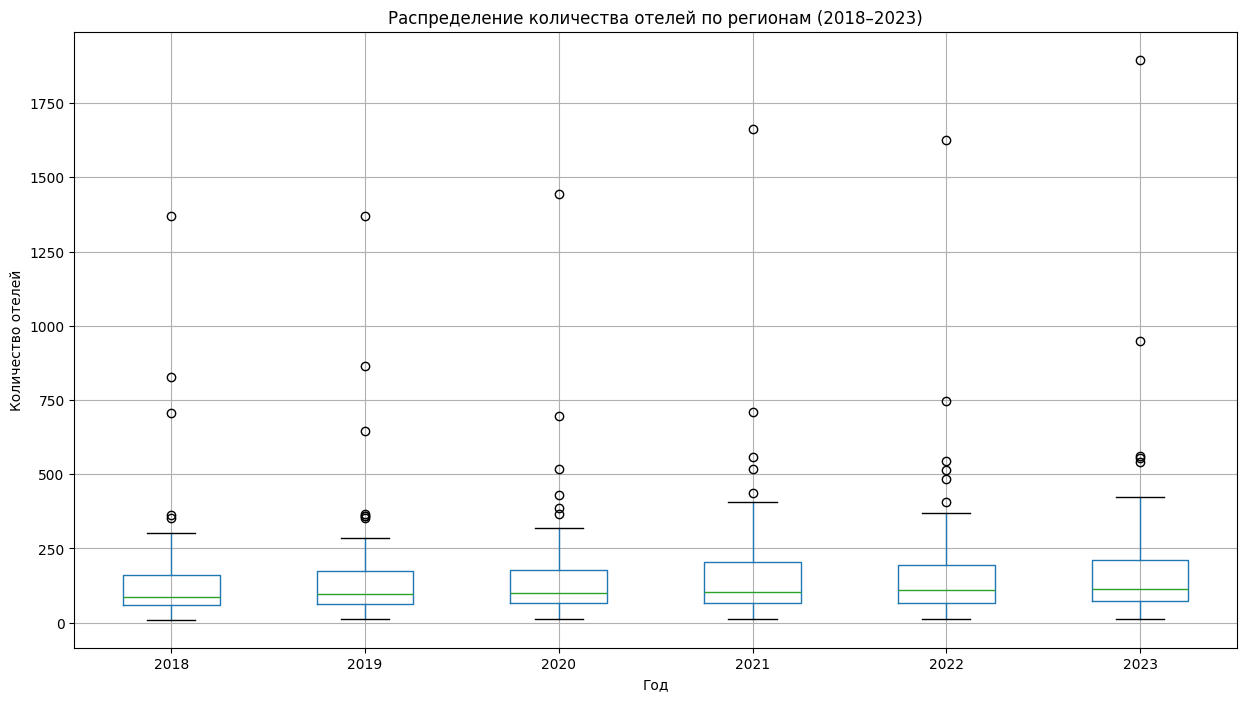

In [62]:
# Фильтрация
hotel_selected = df_hotel[['hotels_2018', 'hotels_2019', 'hotels_2020', 'hotels_2021', 'hotels_2022', 'hotels_2023']]

# Визуализация
plt.figure(figsize=(15, 8))
hotel_selected.boxplot()
plt.title("Распределение количества отелей по регионам (2018–2023)")
plt.ylabel("Количество отелей")
plt.xlabel("Год")
plt.xticks(ticks=[1, 2, 3, 4, 5, 6], labels=["2018", "2019", "2020", "2021", "2022", "2023"])
plt.show()

**Вывод:**
- Граница без учета выборосов постепенно увеличивается к 2023 году, что говорит о росте числа отелей.
- Медиана практически неизменна на протяжении всего времени.

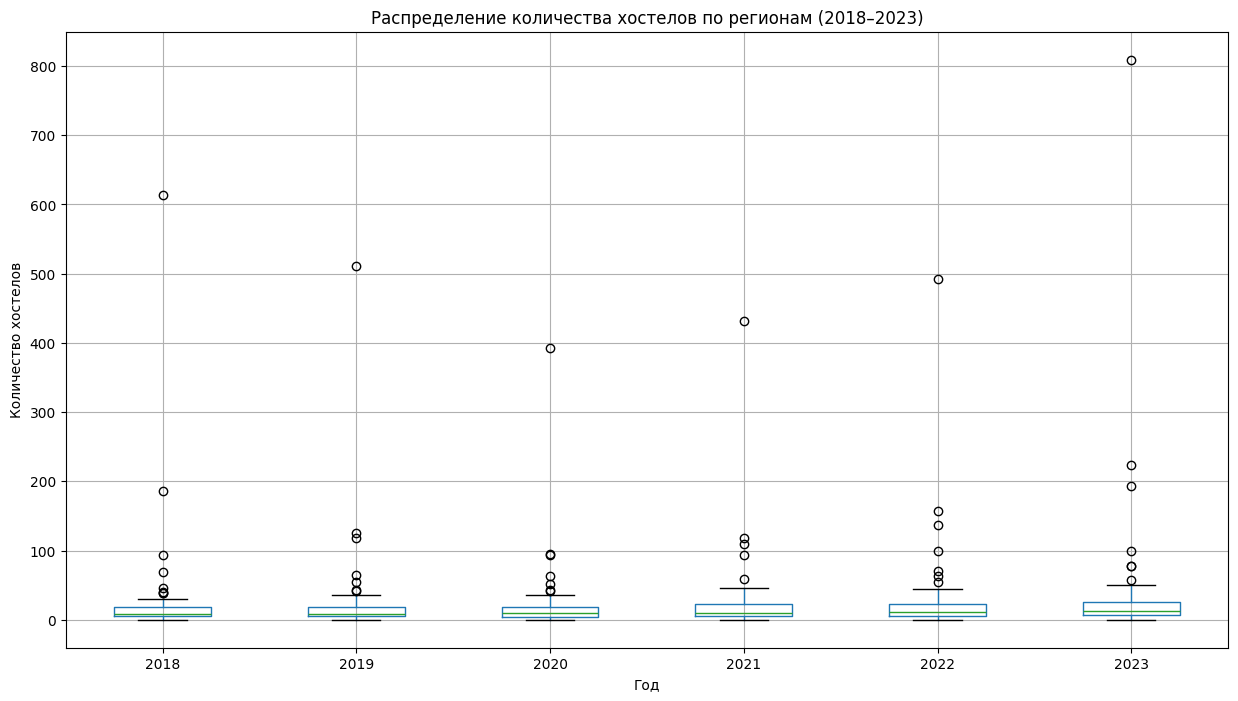

In [63]:
# Визуализация для хостелов
hostel_selected = df_hotel[['hostels_2018', 'hostels_2019', 'hostels_2020','hostels_2021', 'hostels_2022', 'hostels_2023']]

plt.figure(figsize=(15, 8))
hostel_selected.boxplot()
plt.title("Распределение количества хостелов по регионам (2018–2023)")
plt.ylabel("Количество хостелов")
plt.xlabel("Год")
plt.xticks(ticks=[1, 2, 3, 4, 5, 6], labels=["2018", "2019", "2020", "2021", "2022", "2023"])
plt.show()

- В 2022–2023 годы отмечается расширение рынка хостелов в отдельных туристических центрах.

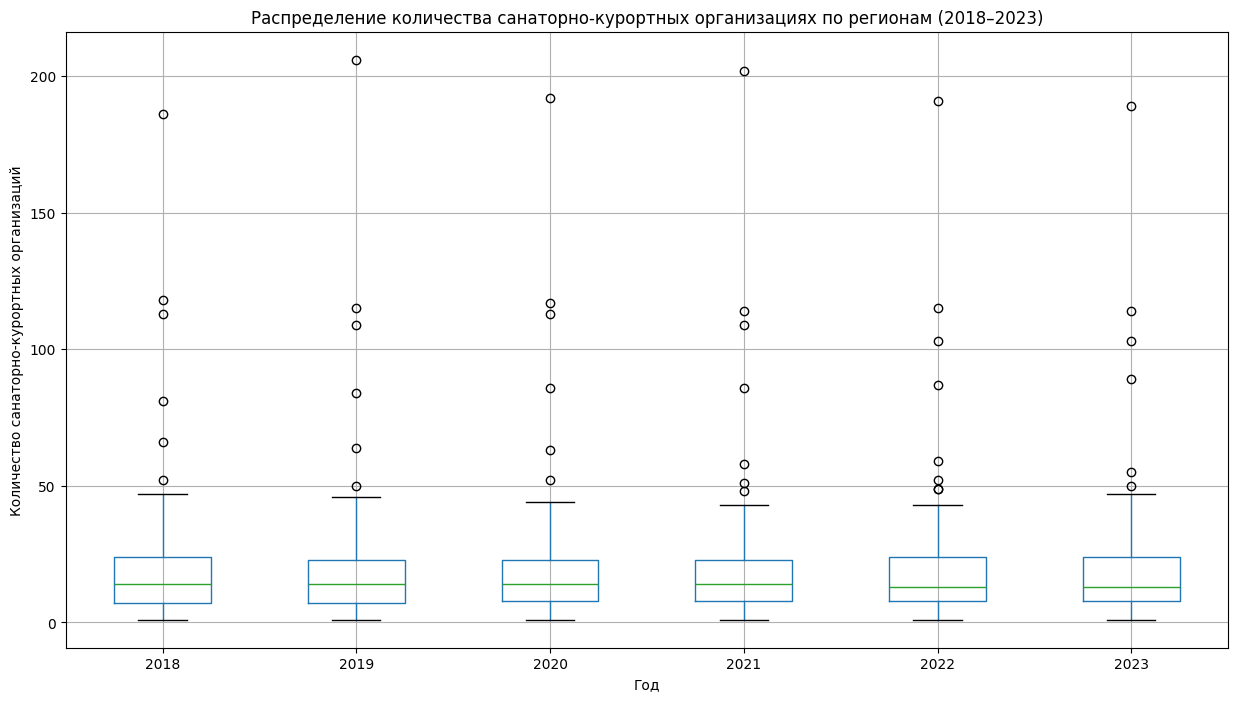

In [64]:
# Визуализация для санаториев
spa_selected = df_hotel[['spa_orgs_2018', 'spa_orgs_2019', 'spa_orgs_2020', 'spa_orgs_2021', 'spa_orgs_2022', 'spa_orgs_2023']]

plt.figure(figsize=(15, 8))
spa_selected.boxplot()
plt.title("Распределение количества санаторно-курортных организациях по регионам (2018–2023)")
plt.ylabel("Количество санаторно-курортных организаций")
plt.xlabel("Год")
plt.xticks(ticks=[1, 2, 3, 4, 5, 6], labels=["2018", "2019", "2020", "2021", "2022", "2023"])
plt.show()

- Каждый год встречаются анамально высокие значения, что говорит о наличии выборосов.
- В некоторых регионах более 100–200 санаториев, в то время как у большинства этот показатель ниже 50.

Определим топ-10 регионов России с наибольшей стоимостью турпакетов в 2023 году.

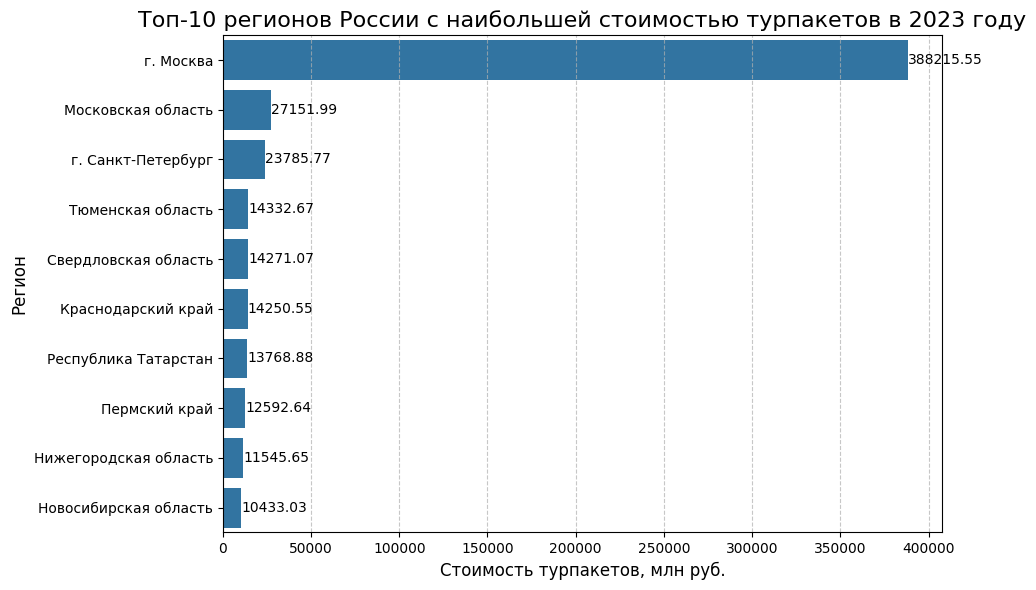

In [65]:
# Сортируем данные

top_regions = df_tour_cost_2023.sort_values(by="total_tour_cost_million_2023", ascending=False).head(10)

# Визуализация
plt.figure(figsize=(10, 6))
sns.barplot(
    x='total_tour_cost_million_2023',
    y='region',
    data=top_regions)

plt.title('Топ-10 регионов России с наибольшей стоимостью турпакетов в 2023 году', fontsize=16)
plt.xlabel('Стоимость турпакетов, млн руб.', fontsize=12)
plt.ylabel('Регион', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

for index, value in enumerate(top_regions['total_tour_cost_million_2023']):
    plt.text(value, index, f'{value:.2f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

- Москва значительно опережает остальные регионы с общей стоимостью турпакетов в 388 215,55 млн рублей. Это объясняется статусом Москвы как главного туристического, делового и культурного центра страны, а также высокой концентрацией туристических услуг и инфраструктуры.
- Московская область (27 151,99 млн рублей) и Санкт-Петербург (23 785,77 млн рублей) занимают второе и третье места соответственно. Эти регионы также являются ключевыми туристическими направлениями благодаря развитой инфраструктуре, историческим достопримечательностям и близости к столице.
- Наблюдается значительный разрыв между Москвой и остальными регионами. 

Изучим изменения среднего количества турпакетов в России по категориям с 2018 по 2023 год.

In [66]:
# Создадим словарь, который хранит данные о среднем количестве проданных турпакетов

average_values = {
    'Year': ['2018', '2019', '2020', '2021', '2022', '2023'],
    'Total Packages': [
        df_tour_firm['total_tour_packages_2018'].mean(),
        df_tour_firm['total_tour_packages_2019'].mean(),
        df_tour_firm['total_tour_packages_2020'].mean(),
        df_tour_firm['total_tour_packages_2021'].mean(),
        df_tour_firm['total_tour_packages_2022'].mean(),
        df_tour_firm['total_tour_packages_2023'].mean(),
    ],
    'Domestic Russia': [
        df_tour_firm['domestic_russia_2018'].mean(),
        df_tour_firm['domestic_russia_2019'].mean(),
        df_tour_firm['domestic_russia_2020'].mean(),
        df_tour_firm['domestic_russia_2021'].mean(),
        df_tour_firm['domestic_russia_2022'].mean(),
        df_tour_firm['domestic_russia_2023'].mean(),
    ],
    'International Russia': [
        df_tour_firm['international_russia_2018'].mean(),
        df_tour_firm['international_russia_2019'].mean(),
        df_tour_firm['international_russia_2020'].mean(),
        df_tour_firm['international_russia_2021'].mean(),
        df_tour_firm['international_russia_2022'].mean(),
        df_tour_firm['international_russia_2023'].mean(),
    ],
    'Foreign in Russia': [
        df_tour_firm['foreign_in_russia_2018'].mean(),
        df_tour_firm['foreign_in_russia_2019'].mean(),
        df_tour_firm['foreign_in_russia_2020'].mean(),
        df_tour_firm['foreign_in_russia_2021'].mean(),
        df_tour_firm['foreign_in_russia_2022'].mean(),
        df_tour_firm['foreign_in_russia_2023'].mean(),
    ]
}

df_avg = pd.DataFrame(average_values)

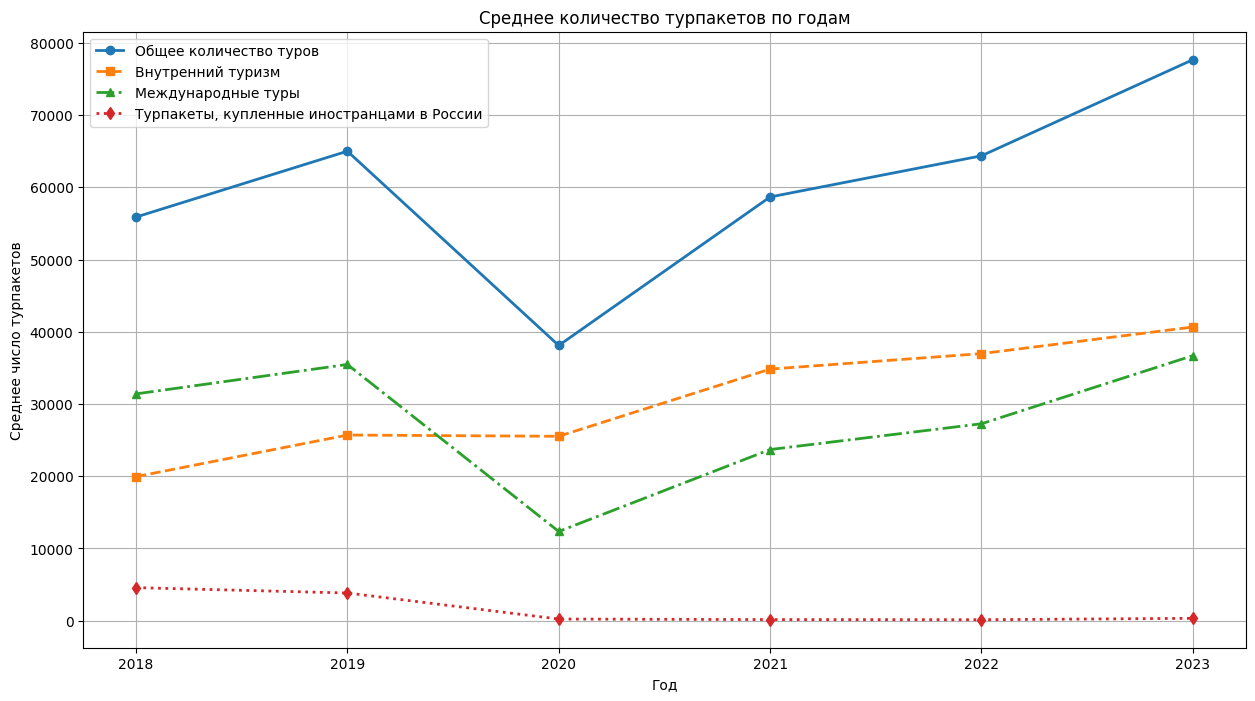

In [67]:
plt.figure(figsize=(15, 8))
plt.plot(df_avg['Year'], df_avg['Total Packages'], marker='o', label='Общее количество туров', linestyle='-', linewidth=2)
plt.plot(df_avg['Year'], df_avg['Domestic Russia'], marker='s', label='Внутренний туризм', linestyle='--', linewidth=2)
plt.plot(df_avg['Year'], df_avg['International Russia'], marker='^', label='Международные туры', linestyle='-.', linewidth=2)
plt.plot(df_avg['Year'], df_avg['Foreign in Russia'], marker='d', label='Турпакеты, купленные иностранцами в России', linestyle=':', linewidth=2)

plt.title('Среднее количество турпакетов по годам')
plt.xlabel('Год')
plt.ylabel('Среднее число турпакетов')
plt.legend()
plt.grid(True)
plt.show()

- Наблюдается общий рост среднего количества турпакетов с 2018 по 2023 год, что свидетельствует о развитии туристической индустрии в России.
- В 2020 году произошёл спад, что связано с пандемией COVID-19 и ограничениями на путешествия. После наблюдается рост.
- Международные туры значительно пострадали в 2020 году из-за пандемии и закрытия границ. В 2021–2022 годах наблюдается частичное восстановление, но уровень 2019 года не достигнут. Это может быть связано с сохраняющимися ограничениями и изменением предпочтений туристов.
- Турпакеты, купленные иностранцами в России, остаются на низком уровне, что указывает на необходимость усиления маркетинговых усилий для привлечения иностранных туристов.

<a class="anchor" id="4-bullet"></a>
## Шаг 4. Проверка гипотез

Проверка гипотезы с одной выборкой

$H_0$: Средняя стоимость реализованных турпакетов в 2023 году (млн рублей) = 800


$H_1$: Средняя стоимость реализованных турпакетов в 2023 году (млн рублей) > 800

In [68]:
# Выберем столбец, содержащий данные о стоимости турпакетов
total_tour_cost_2023 = df_tour_cost_2023['total_tour_cost_million_2023']

# Параметры
expected_mean_tour_cost = 800
alpha = 0.05

# t-тест
results = st.ttest_1samp(
    total_tour_cost_2023,
    expected_mean_tour_cost,
    alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: nan
Не получилось отвергнуть нулевую гипотезу


Проверка гипотезы с двумя выборками

$H_0$: Среднее количество турпакетов, реализованных в 2022 году = Среднему количеству турпакетов, реализованных в 2023 году

$H_1$: Среднее количество турпакетов, реализованных в 2022 году < Cреднего количества турпакетов, реализованных в 2023 году

In [69]:
df_tour_firm['domestic_russia_2023'].mean()

domestic_russia_2022 = df_tour_firm['domestic_russia_2022']
domestic_russia_2023 = df_tour_firm['domestic_russia_2023']
alpha = 0.05

results = st.ttest_ind(
    domestic_russia_2022,
    domestic_russia_2023,
    alternative='less'
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.43088448306931165
Не получилось отвергнуть нулевую гипотезу


- p-value = 0.431, что намного больше 0.05. Данные не подтверждают, что россияне стали больше путешествовать в 2023 году по сравнению с 2022 годом.
- Хотя среднее количество туров в 2023 году выше (40650), разница недостаточно значима с точки зрения статистики. Значение p-value = 0.431 говорит о высокой вероятности того, что наблюдаемые различия могли возникнуть случайно.